# COVID-19 Vaccination Rates in Red and Blue States

## Overview 

In this project I analyzed COVID-19 vaccination rates along with state political party affiliations to determine if there is a statistical difference in mean vaccination rates among Democratic and Republican states. While I predicted
that Democratic states would have statistically higher vaccination rates on average, I found that the observed difference in means was not statistically significant at any legitimate significance level using an A/B permutation test. The results highlight how I often allow media to sway my own judgements when it comes to political ideaology.

## Research Question
Is there a present-day, significant difference in the percentage of citizens vaccinated against COVID-19 among Democratic and Republican states in the U.S.?

## Background & Prior Work

On January 20, 2020 the United States reported its first case of the novel coronavirus in Washington state. Following this, the country - and world -  entered a state of chaos and upheaval, attempting to contain and mitigate the spread of the virus. At the end of January 2020, the coronavirus outbreak was officially declared a Public Health Emergency of International Concern by the World Health Organization. To date, there have been over six million COVID-19 related deaths worldwide, over one million of which belonging to the United States. Vaccinations against COVID-19 began rolling out in early 2021 and by March of that year more than one hundred million vaccinations had been administered in the U.S.. 

Amidst the onset of the COVID-19 pandemic the media portrayed Republican political leaders, such as Donald Trump, downplaying the deadly virus and mocking safety guidelines set by medical professionals. The media I took in at the time, highlighted these actions almost as much as the effects of the pandemic itself. As the COVID-19 vaccination became widely available to the public in the United States in early 2021, I also heard about the display of hesitancy by certain populations to receive the vaccine. The news depicted the populations that displayed hesitancy to be those with strong religious beliefs and those that like to hold on to their personal freedoms. In my mind, and likely the minds of many others, these population characteristics fell deeply in-line with those of right-wing America.

References:
- (1) https://www.cdc.gov/museum/timeline/covid19.html
- (2) https://abcnews.go.com/Politics/trump-downplaying-virus-mocked-wearing-masks-months/story?id=73392694
- (3) https://www.npr.org/2021/12/06/1057344561/anti-vaccine-activists-political-conference-trump-republicans

##  Hypothesis

After witnessing a lack of Republican leaders taking the COVID-19 pandemic seriously and reading about right-wing activists opposing vaccine mandates, I hypothesized that there would be a significant present-day difference in the vaccination rates administered between Republican and Democratic states in the U.S.. I predicted that Democratic affiliated states would have higher vaccination percentages on average than Republican affiliated states. I tested this hypothesis by carrying out exploratory data analysis and conducting an A/B permutation test using difference in means as the test statistic. I picked this hypothesis to identify any possible disparities in vaccination rates between states in America, allowing me to see where more people are vaccinated and less people are vaccinated.

## Data

Starting this project, I dreamt of an ideal dataset which contained the following variables: U.S state, vaccination rate percentage of that state, and the political party affiliation of the state (Republican or Democrat). The number of observations would be equal to 50 (i.e: one row corresponding to each state). This data would be would be available online for use by the public and come from a legitimate source. Ideally, this data would be stored/organized in a CSV format so that it could easily be cleaned/manipulated as well as merged with other tables if required, but other formats (such as json) could also be worked with.
 
I used these expectations to help guide me in looking for data. Ultimately, I found two datasets that with some cleaning and manipulation, could be used to complete the analysis in question.

Dataset #1

- Name: “COVID-19 Vaccinations in the United States, County”
- Link: https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh
- Number of observations: 1.67M

This dataset from the Centers for Disease Control and Prevention contained the information I needed for present-day vaccination percentages in the United States. This data contained information on date, county, state, and the proportion of fully vaccinated people. Since the raw dataset was at the county level I had to use a groupby function to bring it to the state level. The raw data spanned chronologically from December of 2020 (when COVID-19 vaccines first became available) to present day. For the purposes of this project, I used January 1st, 2022 as the "present day" date.

Dataset #2

- Name: State Political Parties
- Link: https://www.kff.org/other/state-indicator/state-political-parties/?currentTimeframe=0&selectedDistributions=governor-political-affiliation--state-senate-majority-political-affiliation--state-house-majority-political-affiliation--state-attorney-general-political-affiliation--state-insurance-commissioner-political-affiliation&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
- Number of observations: 51

This dataset from Kaiser Family Foundation contained the information I needed for political party affiliation by each state in the United States. This data was quite simple and only had a couple columns pertaining to Governer, Senate, and House party affiliatons. I cleaned this dataset to only contain the Governer Affiliation column, as that was what I needed to carry out analysis.

I merged the datasets by state, using an outer merge, once I cleaned the raw data. This was a relatively simple process using the pandas.DataFrame.merge() function.

## Setup

In [2]:
# import required packages for data cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read in both required datasets
vaccines = pd.read_csv("COVID-19_Vaccinations_in_the_United_States_County_2.csv")
politics = pd.read_csv("politics.csv")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
# take a look at the raw data - vaccines
vaccines.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
0,05/06/2022,05135,18,Sharp County,AR,90.5,8064.0,46.2,8061.0,48.9,...,7.0,7.0,7.0,6.0,17442.0,16484.0,2623.0,15166.0,13861.0,4604.0
1,05/06/2022,05139,18,Union County,AR,90.5,23842.0,61.6,23833.0,65.9,...,6.0,6.0,6.0,6.0,38682.0,36146.0,6730.0,32555.0,29416.0,7119.0
2,05/06/2022,13009,18,Baldwin County,GA,89.4,22524.0,50.2,22523.0,52.7,...,7.0,7.0,7.0,6.0,44890.0,42777.0,6175.0,39513.0,36602.0,7398.0
3,05/06/2022,13019,18,Berrien County,GA,89.4,7770.0,40.1,7768.0,42.7,...,5.0,5.0,6.0,5.0,19397.0,18178.0,3418.0,16438.0,14760.0,3342.0
4,05/06/2022,13123,18,Gilmer County,GA,89.4,14411.0,45.9,14411.0,48.4,...,7.0,7.0,7.0,6.0,31369.0,29747.0,4309.0,27496.0,25438.0,8011.0


In [6]:
# take a look at the raw data - politics
politics.head()

,State,Affiliation
0,Alabama,Republican
1,Alaska,Republican
2,Arizona,Republican
3,Arkansas,Republican
4,California,Democrat


## Data Cleaning

### Clean the vaccination data

In [7]:
# only keep the necessary columns
vaccines = vaccines[["Date", "Recip_County", "Recip_State", "Completeness_pct"]]

# get the 'current' data - January 1st, 2022
vaccines = vaccines[vaccines["Date"] == "01/01/2022"]

# rename columns to make names easier to work with
vaccines = vaccines.rename(columns = {"Date": "date",
                          "Recip_County": "county", "Recip_State": "state", "Completeness_pct": "percent vaccinated"})
# inspect data
vaccines.head()

,date,county,state,percent vaccinated
410397,01/01/2022,Costilla County,CO,97.3
410398,01/01/2022,Atkinson County,GA,59.8
410399,01/01/2022,Ben Hill County,GA,59.8
410400,01/01/2022,Dodge County,GA,59.8
410401,01/01/2022,Wilkes County,GA,59.8


In [8]:
# check for unique states + drop territories and unknown counties
state_dict = {"Alabama": "AL", "Alaska":"AK",
             "Arizona":"AZ", "Arkansas": "AR",
             "California":"CA", "Colorado":"CO",
             "Connecticut":"CT", "Delaware":"DE",
             "Florida":"FL", "Georgia": "GA", "Hawaii": "HI",
             "Idaho": "ID", "Illinois":"IL", 
             "Indiana":"IN", "Iowa":"IA",
             "Kansas":"KS", "Kentucky":"KY",
             "Louisiana":"LA", "Maine":"ME",
             "Maryland":"MD", "Massachusetts":"MA",
             "Michigan":"MI", "Minnesota":"MN",
             "Mississippi":"MS", "Missouri":"MO",
             "Montana":"MT", "Nebraska":"NE",
             "Nevada":"NV", "New Hampshire":"NH",
             "New Jersey":"NJ", "New Mexico":"NM",
             "New York":"NY", "North Carolina":"NC",
             "North Dakota":"ND","Ohio":"OH",
             "Oklahoma":"OK", "Oregon":"OR", 
             "Pennsylvania":"PA",
             "Rhode Island":"RI", "South Carolina":"SC",
             "South Dakota":"SD", "Tennessee":"TN",
             "Texas":"TX", "Utah":"UT", "Vermont":"VT", "Virginia":"VA",
             "Washington":"WA", "West Virginia": "WV", 
             "Wisconsin":"WI", "Wyoming":"WY"}
keys = state_dict.keys()
values = state_dict.values()
new_dict = dict(zip(values, keys))

vaccines = vaccines[vaccines["state"]!="GU"]
vaccines = vaccines[vaccines["state"]!="CZ"]
vaccines = vaccines[vaccines["state"]!="DC"]
vaccines = vaccines[vaccines["state"]!="PR"]
vaccines = vaccines[vaccines["state"]!="VI"]
vaccines = vaccines[vaccines["county"]!="Unknown County"]

In [9]:
# check for NA values - none
na = vaccines.isna()
print(sum(na["date"] == True))
print(sum(na["county"] == True))
print(sum(na["state"] == True))
print(sum(na["percent vaccinated"] == True))

0
0
0
0


In [10]:
# add the full state name for further clarity
mapper = lambda x: new_dict[x]
vaccines["state full name"] = vaccines["state"].apply(mapper)

In [11]:
# bring data to the state level - group by state and take the mean for each based on the county data
grouped_vaccines = vaccines.groupby("state full name").mean()
grouped_vaccines = grouped_vaccines.reset_index()
grouped_vaccines.head()

,state full name,percent vaccinated
0,Alabama,92.700000
1,Alaska,96.700000
2,Arizona,97.700000
3,Arkansas,90.400000
4,California,84.051724


### Clean the politics data

In [12]:
# make the column names easier to work with
politics = politics.rename(columns = {"State":"state", "Affiliation":"party"})
politics.head()

,state,party
0,Alabama,Republican
1,Alaska,Republican
2,Arizona,Republican
3,Arkansas,Republican
4,California,Democrat


### Merge the two dataframes

In [13]:
final_df = grouped_vaccines.merge(politics, left_on = "state full name", right_on = "state")
final_df = final_df.drop(columns = "state")
final_df = final_df.rename(columns = {"state full name":"state"})
final_df.head()

,state,percent vaccinated,party
0,Alabama,92.700000,Republican
1,Alaska,96.700000,Republican
2,Arizona,97.700000,Republican
3,Arkansas,90.400000,Republican
4,California,84.051724,Democrat


## EDA

### Basic descriptions

Interestingly, the state with lowest percent vaccinated is "Hawaii" which is a Democratic state while the state with the highest percent vaccinated is "Maryland" which is a Republican state. This result directly contrasts my original hypothesis. 

In [14]:
final_df.shape

(50, 3)

In [15]:
final_df.describe()

,percent vaccinated
count,50.000000
mean,92.844105
std,10.448635
min,40.000000
25%,93.725000
50%,96.400000
75%,97.600000
max,98.700000


In [16]:
final_df[final_df["percent vaccinated"] == 40.000000]

,state,percent vaccinated,party
10,Hawaii,40.0,Democrat


In [17]:
final_df[final_df["percent vaccinated"] == 98.700000]

,state,percent vaccinated,party
19,Maryland,98.7,Republican


### Maps

Mapping the breakdown of Republican vs. Democratic states gave me a better geographic sense of which states fall into which group. Plotting a heat map of vaccination percentages gave me an idea of which states had a high percent vaccinated and which states had a low percent vaccinated.

In [18]:
# import geopandas + read in state data to make a map
import geopandas as gpd
states = gpd.read_file("cb_2018_us_state_5m.shp")
states = states[["NAME", "geometry"]]
states = states.rename(columns = {"NAME":"name"})
map_data = states.merge(final_df, left_on = "name", right_on = "state")
map_data = map_data.drop(columns = "state")
map_data = map_data[map_data["name"] != "Hawaii"]
map_data = map_data[map_data["name"] != "Alaska"]
map_data.head()

,name,geometry,percent vaccinated,party
0,Nebraska,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",90.300000,Republican
1,Washington,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217...",96.200000,Democrat
2,New Mexico,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",97.200000,Democrat
3,South Dakota,"POLYGON ((-104.05770 44.99743, -104.05021 44.9...",96.700000,Republican
4,Texas,"POLYGON ((-106.64548 31.89867, -106.64084 31.9...",98.319685,Republican


<AxesSubplot:title={'center':'State Party Affiliations'}>

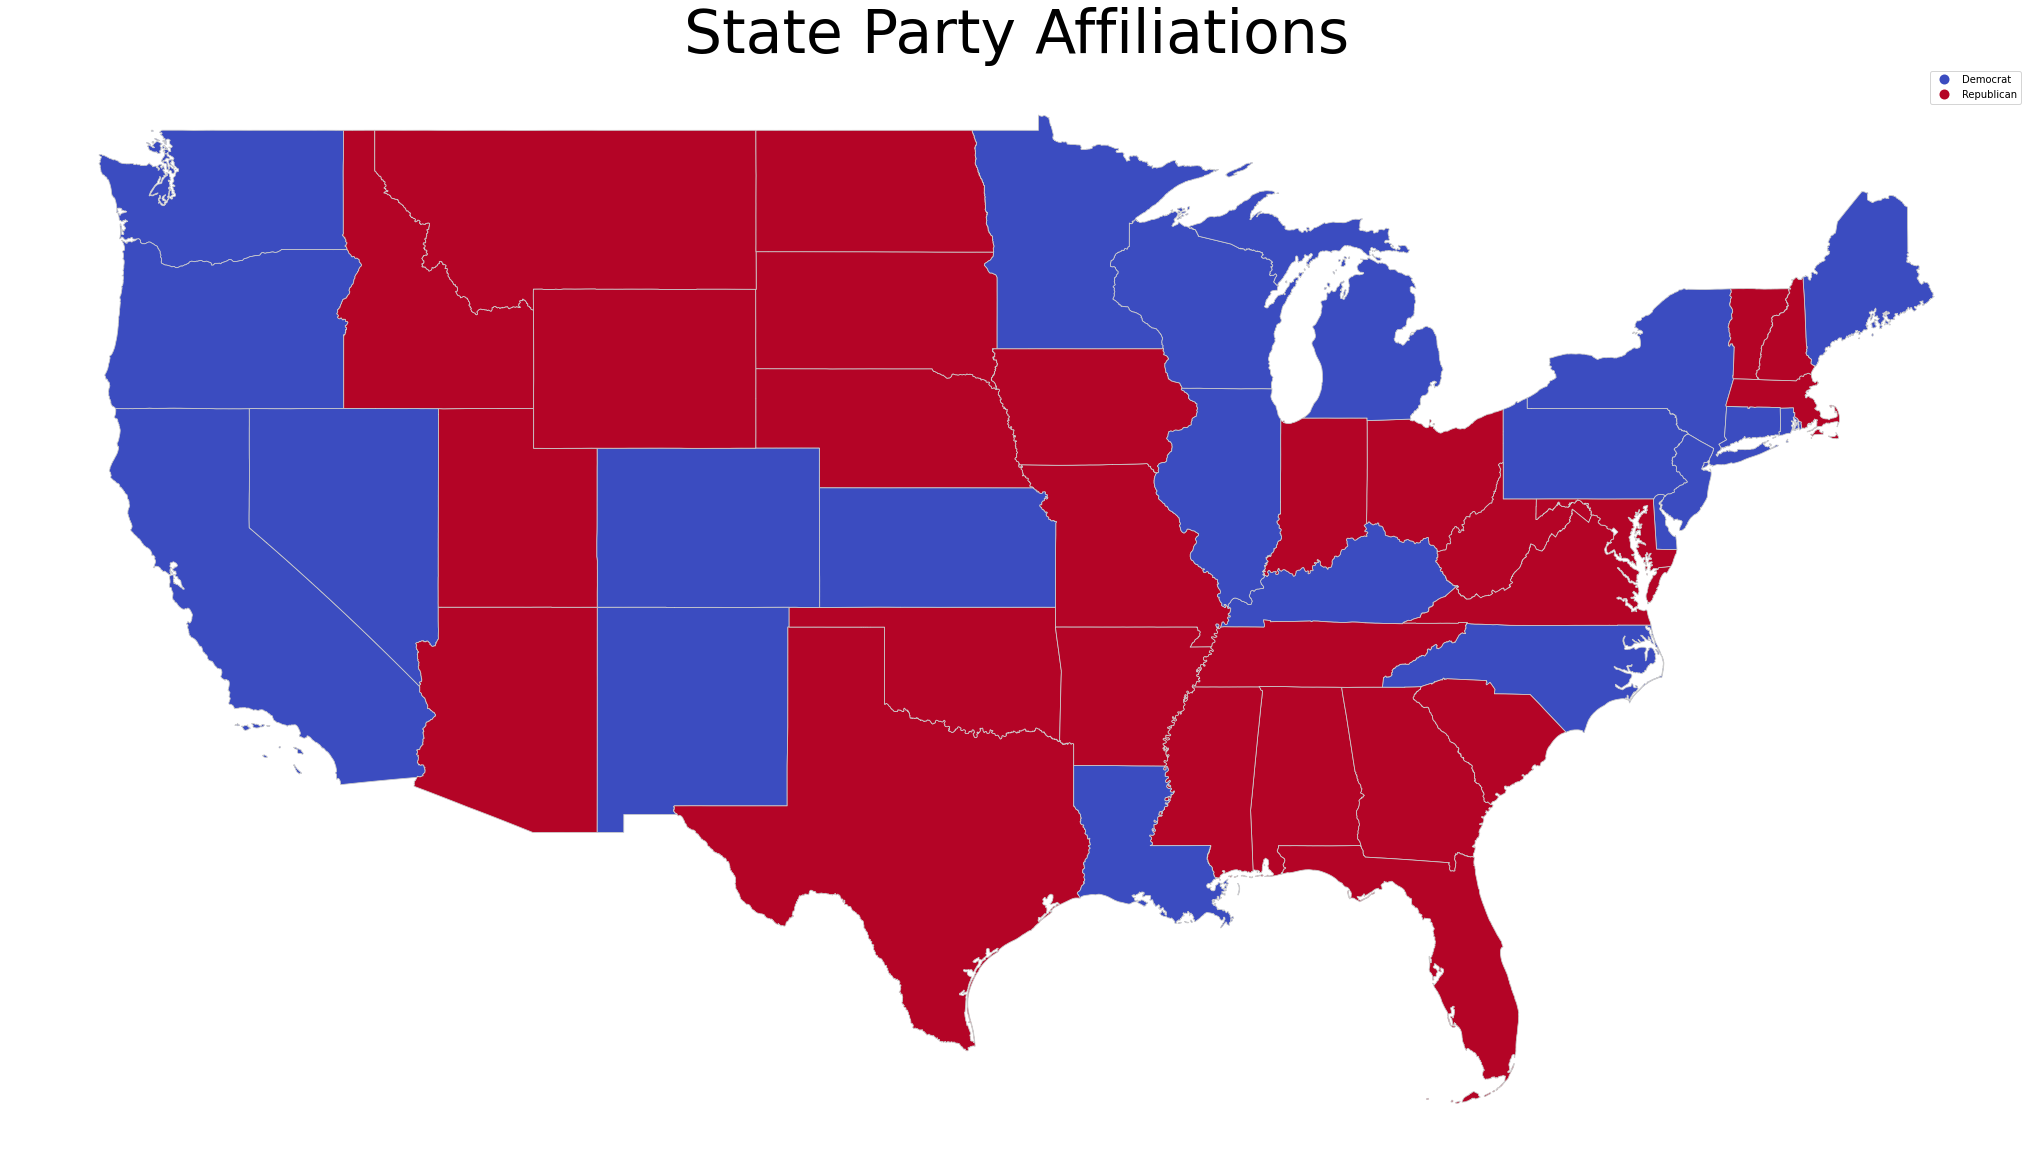

In [19]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('State Party Affiliations', fontdict={'fontsize': '60', 'fontweight' : '3'})
color = 'coolwarm'
map_data.plot('party', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20), legend = True)

<AxesSubplot:title={'center':'Heat Map of Vaccinations'}>

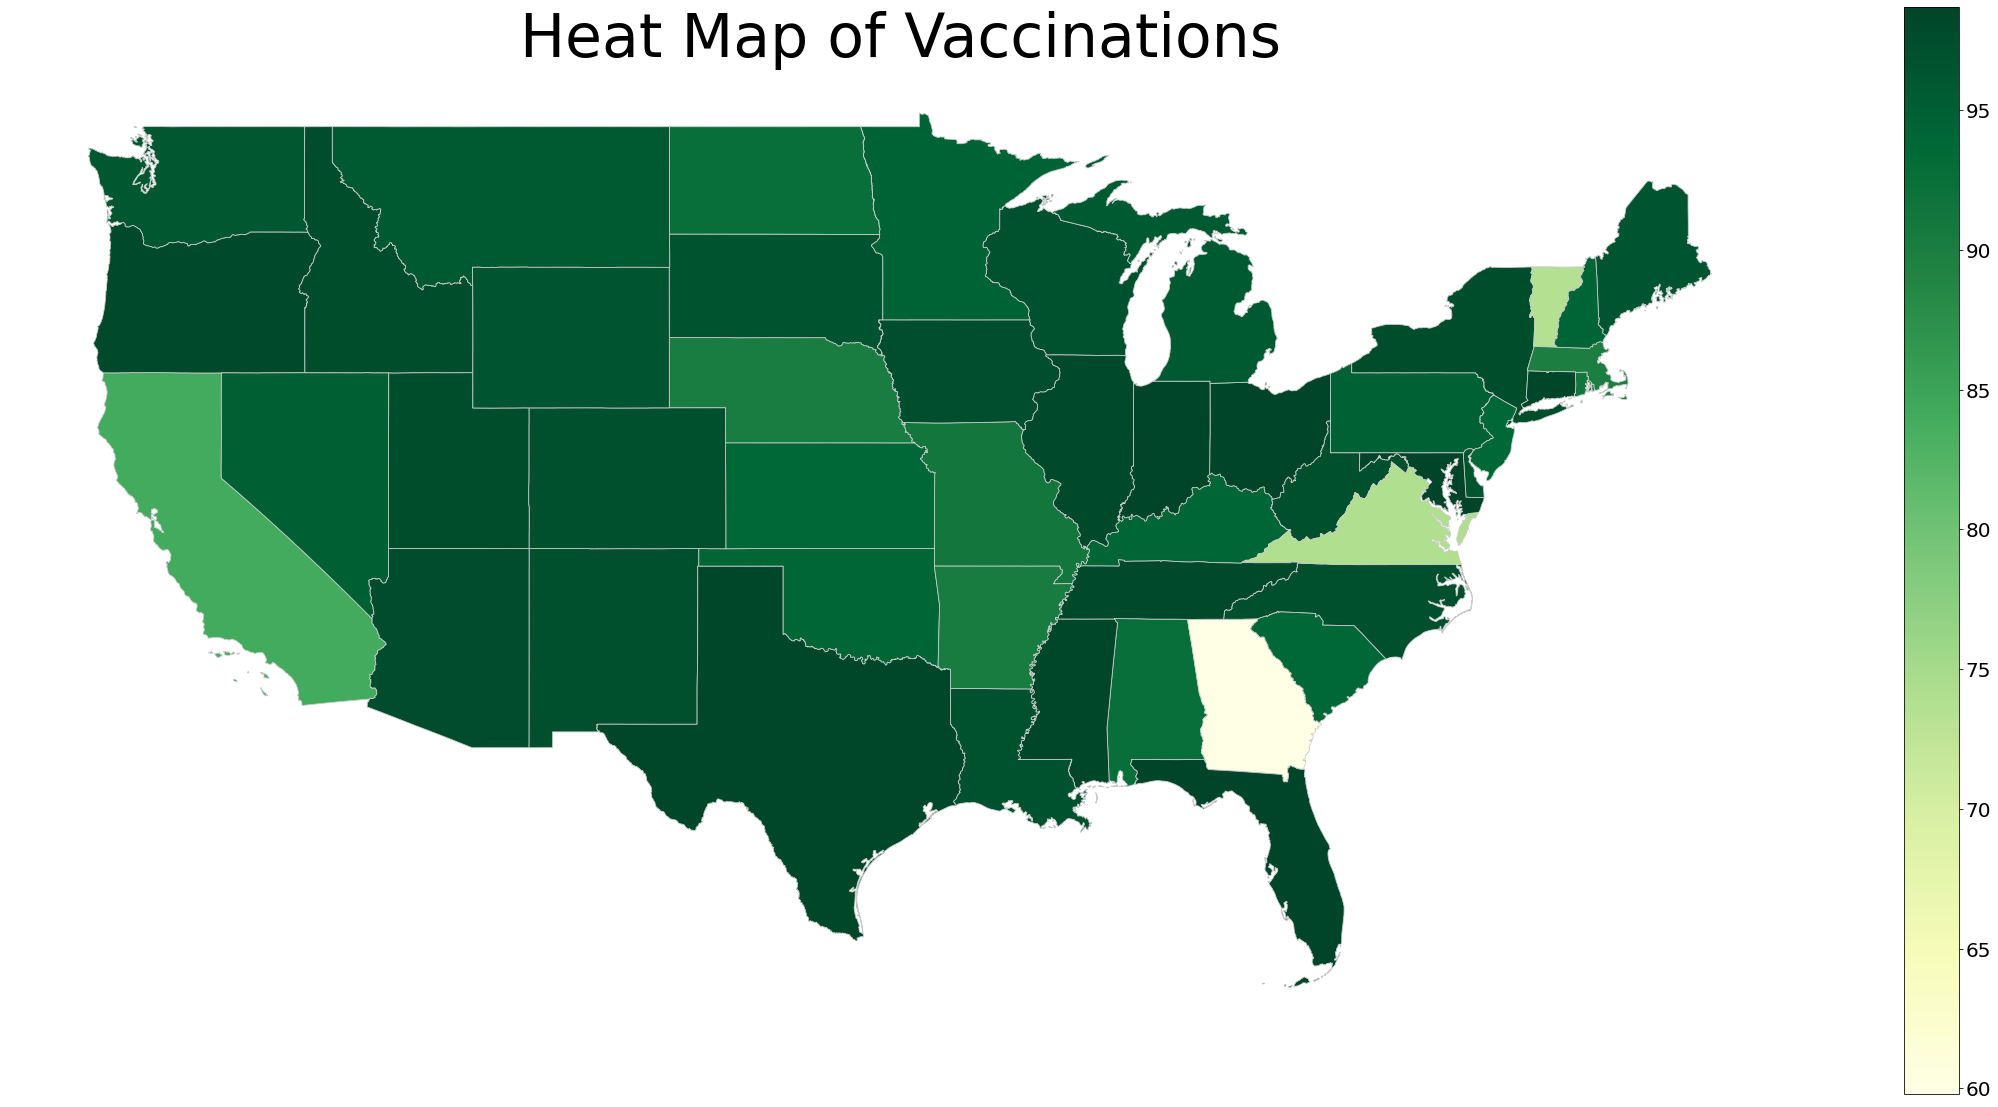

In [20]:
fig2, ax2 = plt.subplots(1, figsize=(40, 20))
ax2.axis('off')
ax2.set_title('Heat Map of Vaccinations', fontdict={'fontsize': '60', 'fontweight' : '3'})

data_max = map_data["percent vaccinated"].max()
data_min = map_data["percent vaccinated"].min()

color = 'YlGn'
vmin, vmax = data_min, data_max
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig2.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

map_data.plot('percent vaccinated', cmap=color, linewidth=0.8, ax=ax2, edgecolor='0.8', figsize=(40,20))

Looking at the heatmap I saw that some states fell in line with my hypothesis while others contradicted it. Georgia, a Republican state, had a relatively low percent vaccinated. But Ohio and Florida, also Republican states had two of the highest vaccination percentages. On the other hand, California - a Democratic state - had a lower percent vaccinated. Other than California, the Democratic states had high vaccination rates on average. Looking at each party seperately, I saw that states in each group had similiar percents vaccinated on average.

In [21]:
final_df.groupby("party").mean()

,percent vaccinated
party,
Democrat,92.856897
Republican,92.834054


### Plots and distributions

Based on the distribution of vaccination rates for Democratic and Republican states I was able to make an interesting observation. Republican states have more spread among their vaccination rates (although not much) while the Democratic states mainly have high vaccination rates with an outlier or two.

Text(0, 0.5, 'Percent of states')

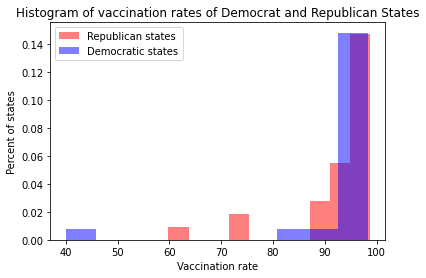

In [22]:
republican_states_df = final_df[final_df['party'] == 'Republican']
democrat_states_df = final_df[final_df['party'] == 'Democrat']
plt.hist(republican_states_df['percent vaccinated'], alpha = 0.5, color = 'red', label = 'Republican states', bins = 10, density = True)
plt.hist(democrat_states_df['percent vaccinated'], alpha = 0.5, color = 'blue', label = 'Democratic states', bins = 10, density = True)
plt.legend(loc = 'upper left')
plt.title('Histogram of vaccination rates of Democrat and Republican States')
plt.xlabel("Vaccination rate")
plt.ylabel("Percent of states")

The box plot showed me, similar to the grouped table above, that the observed means of vaccination rates among Democratic and Republican states is actually very close. And I once again saw the prevalence of the Democratic outlier state which was Hawaii.

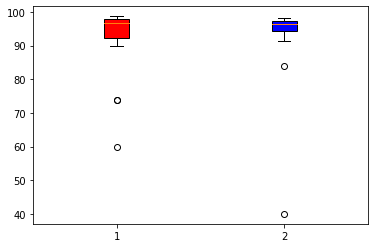

In [23]:
fig, ax = plt.subplots()
combined = [republican_states_df['percent vaccinated'], democrat_states_df['percent vaccinated']]
bplot1 = ax.boxplot(combined,
                     vert=True,  # vertical box alignment
                     patch_artist=True)  # fill with color
                    
colors = ['red', 'blue']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

## Data Analysis and Results

For my analysis I used an A/B permutation test to decide whether the difference in average vaccination rates between Democratic and Republican states was statistically significant or if any difference observed was simply due to random chance. Before starting my project, I predicted that the data would show a large difference between the average vaccination rate among Democratic and Republican states. Upon completion of my EDA I discovered that the observed difference, however, was truly not that large, coming in at around 0.02%. While the observed difference turned out to be small I still decided to carry forward with the A/B permutation test.

To carry out thr statistical test I operated under the following hypotheses:
- $H_0$ (null) : There is no difference in means for vaccination percentages between Democratic and Republican states and any observed difference is due to random chance.
- $H_1$ (alternative): There is a difference in means for vaccination percentages between Democratic and Republican states.

I used difference of means as the test statistic.

To begin the test I defined a function that takes the difference in means of vaccination percentages for states grouped by their political party affiliation. This function helped me later on when simulating the null hypothesis. Using this function I was able to find the true observed difference of means which was 0.023%.

In [24]:
def diff_of_means(data, col):
    """
    calculates the difference in means
    of vaccination percentages for Republican 
    and Democratic states
    """
    copy_data = data.copy(deep = True)
    group_party = copy_data.groupby('party')[col].mean()
    diff_mean = abs(group_party[0] - group_party[1])
    
    return diff_mean

In [25]:
# observed difference
diff_of_means(final_df, "percent vaccinated")

0.022842279372923713

Next, I defined a function that simulates one test statistic under the null hypothesis. I did this randomly by shuffling the political party labels for states and recalculating the difference in means. Simulating just one test-statistic I saw that the random difference in means was ~4.048% (will change when rerun) which is much higher than the observed statistic. In order to see how the random model performed, I had to simulate the test statistic many times. 

In [26]:
def simulate_null(data, col):
    """
    simulates one test statistic
    under the null hypothesis
    """
    data_copy = data.copy(deep = True)
    party = data_copy['party']
    data_copy['party'] = np.random.permutation(party.values)
    t_stat = diff_of_means(data_copy, col)
    
    return t_stat

In [27]:
simulate_null(final_df, "percent vaccinated")

4.048962043001453

Finally, I defined a function that simulates the test statistic 1,000 times and uses those test statistics to calculate the p-value of the test. My obtained p-value was ~0.992 (will change when rerun). This means that in 1,000 simulations the t-stat difference in means was larger than the observed difference around 99% of the time. This indicated to me that I could not reject the null hypothesis that there was any significant difference in means between the vaccination percentages among Democratic and Republican states. A p-value of 0.99 is not statistically significant at any legitimate significance level.

In [28]:
def pval(data, col):
    """
    calculates the p-value for the permutation test
    for 1,000 iterations
    """
    observed = diff_of_means(data, col)
    
    differences = []
    for _ in np.arange(1000):
        diff = simulate_null(data, col)
        differences.append(diff)
    
    p_val = (differences >= observed).sum() / len(differences)
    return p_val

In [29]:
pval(final_df, "percent vaccinated")

0.992

### Retest with Outlier Removed

After observing such a high p-value with the first permutation test I became curious to see how the results would change with any significant outliers removed. I noticed that Hawaii, a Democratic state, only had a vaccination percentage rate of 40% while the other Democratic states typically were much higher. I thought that a state like Hawaii might not have the same access to vaccinations as other states in the contiguous U.S. -- but it still could be low for other reasons as well. For curiousities sake, I decided to rerun the permutation test after removing the state of Hawaii from the dataset to see if this outlier severely impacted the results.

In [30]:
# remove the Democratic outlier
outliers_removed = final_df[(final_df["state"] != "Hawaii")]

After removing the outlier I found that the observed difference in means was much higher at 2.54%, with Democratic states being on the higher end.

In [31]:
# observed difference without Hawaii
diff_of_means(outliers_removed, "percent vaccinated")

2.5398373532645593

In [34]:
# one simulated observation without Hawaii
simulate_null(outliers_removed, "percent vaccinated")

1.8466798906424913

In [35]:
# pval with Hawaii removed
pval(outliers_removed, "percent vaccinated")

0.215

I re-calculated the p-value with Hawaii removed and found a value of approximately 0.25. This value is much closer to being statistically significant, however, it is still not significant at any legitimate significance level. I stopped removing outliers after Hawaii to avoid getting caught up in p-hacking. But I did find the large decrease in p-value and increase in observed difference in means to be interesting.

## Ethics and Privacy

As stated before, an ethical concern with removing the Democratic outlier is getting caught up in p-hacking. I justified removing the outlier to myself based on the major difference between Hawaii's percent vaccinated and the percent vaccinated of other Democratic states, along with the unique attributes of Hawaii compared to other conintental states in the U.S. (ie. the island geography, availability of resources, legitimacy of reporting vaccination rates, etc.). But using these justifications, other states (like Alaska for instance) could have been removed as well. I figured Hawaii was a unique case, however, falling into both categories of being a non-continental state and having an extemely low vaccination percentage. Although rerunning the test with Hawaii removed did not change the overall result it did show me an interesting new observed difference in means. While the new difference should be noted, the results should be interpreted for what they are -- non-significant.

Another ethical concern, is my own personal biases getting in the way of the study. My original hypothesis was based on previous stereotypes of political parties. Although news sources led me to think the way I did, I had to make an attempt when carrying out the analysis to ignore what I believed in the past and truly listen to what the data told me. The results of the test contrasted what I previously thought to be true, and I had to accept that fact. 

Privacy wise, I found it important to protect the identities of those vaccinated vs. those not vaccinated. Luckily, the raw vaccination data came in at the county level without any personally identifiable information.

Lastly, I wanted to ensure that my results did not add any more fuel to the political fire that already burns bright in America. The results of this study actually showed that when it comes to COVID-19 vaccination rates, Democratic and Republican states are actually more alike than they are different.

## Conclusion and Discussion

In my project I looked to see if there was a difference in COVID-19 vaccination percentages among Democratic and Republican states. Based on what I had seen in the media, I hypothesized that Republican states would have lower COVID-19 vaccination percentages on average than Democratic states. I cleaned two datasets and merged them to carry out our analysis. I calculated some basic summary statistics and plotted the data spatially as well plotted the distributions of the data. This helped me to see that there was not much of an observed difference between Democratic and Republican average vaccination rates. It also helped me gain a sense for the presence of outliers in the data.

Next I carried out two different A/B permutation tests. The first used all the data and I obtained a very high p-value which was close to one. I repeated the test excluding Hawaii from the data and found a p-value of around 0.25.  In both cases I failed to reject the null hypothesis. While the null hypothesis can never truly be "accepted", my results indicated that that there probably is not a statistical difference in average vaccination rates among Democratic and Republican states.

The result I obtained surprised me and went against my original hypothesis. This result made me realize that I need to be cognizant of how I allow media to influence my thinking. As I consume more media (specifically biased media -- one way or the other) my personal biases are tinted and possibly that's what happened in this project. Moving forward I will be more careful about what I listen to and what I choose to believe.